<a href="https://colab.research.google.com/github/Mamadou2025/Dual-Rickart-Code-Tester/blob/main/Dual_Rickart_Gcd_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from itertools import product

def gcd(x, y):
    """Computes the GCD of x and y with gcd(0,0) = 0"""
    while y != 0:
        x, y = y, x % y
    return abs(x) if x != 0 else 0

def is_endomorphism(f, M):
    """Checks if f preserves the GCD operation"""
    return all(f[gcd(x, y)] == gcd(f[x], f[y]) for x, y in product(M, repeat=2))

def is_idempotent(f, M):
    """Checks if f ∘ f = f"""
    return all(f[f[x]] == f[x] for x in M)

def direct_image(f, M):
    """Computes the direct image of f"""
    return {f[x] for x in M}

def extended_image(f, M):
    """Computes the closure of the image under GCD"""
    im_f = direct_image(f, M)
    return {y for y in M if any(gcd(y, f[x]) in im_f for x in M)}

def kernel(f, M):
    """Computes the kernel of f (values x where f(x) = 0)"""
    return {x for x in M if f[x] == 0}

def generate_valid_functions(M):
    """Generates all valid endomorphism functions"""
    functions = []
    for f_vals in product(M, repeat=len(M)):
        f = dict(enumerate(f_vals))
        if f[0] == 0 and is_endomorphism(f, M):
            functions.append(f)
    return functions

def analyze_functions(M):
    """Displays analysis and checks the Dual weak Rickart property"""
    valid_functions = generate_valid_functions(M)
    idempotents = [g for g in valid_functions if is_idempotent(g, M)]

    # Display table
    print("\nFunction".ljust(15), "Idempotent".ljust(12), "Image".ljust(15),
          "Extended Image".ljust(18), "Kernel".ljust(15), "i-regular")
    print("-" * 85)

    for f in valid_functions:
        f_tuple = tuple(f[i] for i in sorted(M))
        im = direct_image(f, M)
        im_et = extended_image(f, M)
        ker = kernel(f, M)

        line = f"{str(f_tuple).ljust(15)} | "
        line += f"{'Yes'.ljust(10) if is_idempotent(f, M) else 'No'.ljust(10)} | "
        line += f"{str(im).ljust(13)} | "
        line += f"{str(im_et).ljust(16)} | "
        line += f"{str(ker).ljust(13)} | "
        line += "Yes" if im == im_et else "No"  # ✅ Corrected i-regular logic
        print(line)

    # Check Dual weak Rickart property
    is_dual_weak_rickart = True
    for f in valid_functions:
        im_et_f = extended_image(f, M)
        # Check if there exists an idempotent g such that im_et_f == kernel(g)
        if not any(im_et_f == kernel(g, M) for g in idempotents):
            is_dual_weak_rickart = False
            break

    print("\nFinal Result:")
    print("M is Dual weak Rickart :", "Yes" if is_dual_weak_rickart else "No")

# Example usage
n = 2  # You can modify n
M = list(range(n + 1))
analyze_functions(M)


Function       Idempotent   Image           Extended Image     Kernel          i-regular
-------------------------------------------------------------------------------------
(0, 0, 0)       | Yes        | {0}           | {0}              | {0, 1, 2}     | Yes
(0, 1, 0)       | Yes        | {0, 1}        | {0, 1, 2}        | {0, 2}        | No
(0, 1, 1)       | Yes        | {0, 1}        | {0, 1, 2}        | {0}           | No
(0, 1, 2)       | Yes        | {0, 1, 2}     | {0, 1, 2}        | {0}           | Yes
(0, 2, 0)       | No         | {0, 2}        | {0, 2}           | {0, 2}        | Yes
(0, 2, 2)       | Yes        | {0, 2}        | {0, 2}           | {0}           | Yes

Final Result:
M is Dual weak Rickart : Yes


HOW TO USE THIS CODE
Choose your n, then press the Run button to execute. Result for n=2

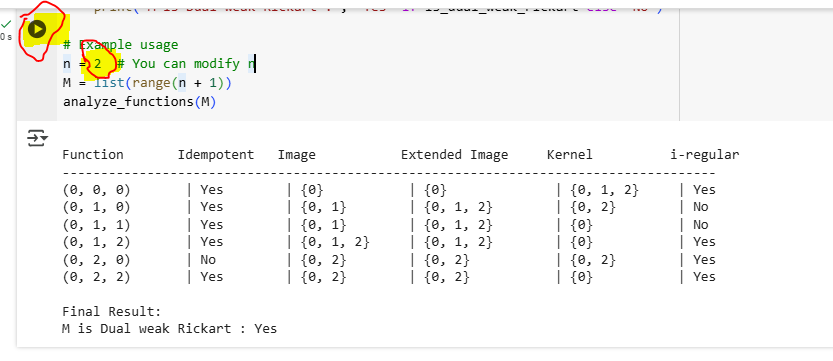

Dual Rickart Properties for Semimodules

This Python implementation is designed to test the dual weak Rickart property for semimodules over natural numbers using the GCD operation or THE MAX operation. The script leverages the combinatorial functionality of the itertools library to analyze all possible functions on the finite set M = {0, 1, ..., n}, where n is a user-defined input.

Functional Highlights:

Endomorphism Validation: Functions f: M → M are filtered based on two criteria:

f(0) = 0, ensuring that zero maps to zero.
Preservation of the GCD operation: f(gcd(x, y)) = gcd(f(x), f(y)), for all x, y ∈ M.
Idempotency Check: The function checks if f(f(x)) = f(x), identifying idempotent functions within the set of valid endomorphisms.

Extended Image Calculation: The algorithm calculates the extended image of a function f using the logic that a value y ∈ M belongs to the extended image if there exists x1, x2 ∈ M such that gcd(y, f(x1)) = f(x2).

Classification of Semimodules:

Dual Dual Rickart (Type 2): Determines if every function f has an associated idempotent function g such proper image of f coincides with kernel of g.
Dual Dual Rickart (Type 1): Examines whether the extended image of f matches the kernel of g.
Performance: The runtime of the program depends exponentially on n, as all possible functions are generated and verified. Computational resources provided by Python's runtime environment are critical.

DESCRIPTION OF THE ALGORITHM

Checking the Dual Rickart and Baer Properties for Semimodules. The Google Colab notebook associated with this study provides a complete implementation of the algorithm used to test the dual weak Rickart property for semimodules defined over the natural numbers with the GCD operation. The notebook allows the user to input a natural number n, generate all valid endomorphisms on the finite set M = {0, 1, ..., n}, analyze their algebraic properties, and determine whether the structure satisfies the dual weak Rickart condition. The computational process includes checking for idempotency, computing the kernel, direct image, extended image, and i-regularity of each function. Since the number of possible functions increases exponentially with n, the runtime and performance of the notebook are dependent on the computational resources provided by Google Colab. Here's a concise summary of the pseudocode: Algorithm Overview: Input: A non-negative integer n defines the set M = {0, 1, ..., n}. Output: A list of valid endomorphisms on M, their algebraic properties, and whether M satisfies the dual weak Rickart property. Steps:

Initialize the Set: Define M as {0, 1, ..., n}.

Generate Valid Functions: Identify functions f: M → M that (a) map 0 → 0 and (b) preserve the GCD operation.

Classify Functions:

Check for idempotency (f(f(x)) = f(x)).

Compute and store the image, extended image, kernel, and check i-regularity (image = extended image).

REMARK: For the second Python implementation MAX replaces gcd operation. One should remarks that GCD and MAX play symetric function

Test Dual Weak Rickart Property:

Verify if, for every function f, there exists an idempotent function g such that the extended image of f equals the kernel of g.

If all functions satisfy this, M has the dual weak Rickart property.

Output Results: Provide the analysis of each function and report whether M satisfies the property.